In [1]:
#imports
import numpy as np
import astropy 
from astropy.io import ascii
from astropy.io import fits
from astropy.table import Table, Column, join, vstack
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import LogNorm
from pylab import *
from astropy import units as u
from astropy.coordinates import SkyCoord
from matchCatalog import matchCatalog
%matplotlib inline

In [2]:
#open the fits file with the astropy.io.fits:
from astropy.io import fits
test = fits.open('../../PanSTARRS/OrionQuery/tmass-ps1-v1.fits')
#this takes the data from the fits file and puts it into a variable
tableTest = test[1].data
#this is not an astropy Table data structure... but you can read the columns 
#and their names like this:
#list all column data:
tableTest.columns
#just column names
tableTest.columns.names

#but astropy Tables are easier to deal with... so we can just create one!
panStarrs = Table(tableTest)
#reading column names here is done by
#panStarrs.colnames

Fang = ascii.read('../../OrionCatalogs/orionCatalogFang.tsv')
Megeath = ascii.read('../../OrionCatalogs/orionCatalogMegeath.tsv')
Pilliterri = ascii.read('../../OrionCatalogs/orionCatalogPilliterri.tsv')
Cottle = ascii.read('../../KoenigSelectedCatalogs/Orion/SelectionV2/CottleIR_Excess_Selection_v2.txt')

In [3]:
#read in all applicable arrays
#create independent numpy arrays for each magntidue...
#medians:
g_median = []
for i in range(len(panStarrs)):
    g_median.append(panStarrs['median'][i][0])
    
g_median = np.array(g_median)

r_median = []
for i in range(len(panStarrs)):
    r_median.append(panStarrs['median'][i][1])
    
r_median = np.array(r_median)

i_median = []
for i in range(len(panStarrs)):
    i_median.append(panStarrs['median'][i][2])
    
i_median = np.array(i_median)

z_median = []
for i in range(len(panStarrs)):
    z_median.append(panStarrs['median'][i][3])
    
z_median = np.array(z_median)

y_median = []
for i in range(len(panStarrs)):
    y_median.append(panStarrs['median'][i][4])
    
y_median = np.array(y_median)


#mean:
g_mean = []
for i in range(len(panStarrs)):
    g_mean.append(panStarrs['mean'][i][0])
    
g_mean = np.array(g_mean)

r_mean = []
for i in range(len(panStarrs)):
    r_mean.append(panStarrs['mean'][i][1])
    
r_mean = np.array(r_mean)

i_mean = []
for i in range(len(panStarrs)):
    i_mean.append(panStarrs['mean'][i][2])
    
i_mean = np.array(i_mean)

z_mean = []
for i in range(len(panStarrs)):
    z_mean.append(panStarrs['mean'][i][3])
    
z_mean = np.array(z_mean)

y_mean = []
for i in range(len(panStarrs)):
    y_mean.append(panStarrs['median'][i][4])
    
y_mean = np.array(y_mean)


#stdev:
g_stdev = []
for i in range(len(panStarrs)):
    g_stdev.append(panStarrs['stdev'][i][0])
g_stdev = np.array(g_stdev)

r_stdev = []
for i in range(len(panStarrs)):
    r_stdev.append(panStarrs['stdev'][i][1])
r_stdev = np.array(r_stdev)

i_stdev = []
for i in range(len(panStarrs)):
    i_stdev.append(panStarrs['stdev'][i][2])
i_stdev = np.array(i_stdev)

z_stdev = []
for i in range(len(panStarrs)):
    z_stdev.append(panStarrs['stdev'][i][3])
z_stdev = np.array(z_stdev)

y_stdev = []
for i in range(len(panStarrs)):
    y_stdev.append(panStarrs['stdev'][i][4])
y_stdev = np.array(y_stdev)

#err:
g_err = []
for i in range(len(panStarrs)):
    g_err.append(panStarrs['err'][i][0])
g_err = np.array(g_err)

r_err = []
for i in range(len(panStarrs)):
    r_err.append(panStarrs['err'][i][1])
r_err = np.array(r_err)

i_err = []
for i in range(len(panStarrs)):
    i_err.append(panStarrs['err'][i][2])
i_err = np.array(i_err)

z_err = []
for i in range(len(panStarrs)):
    z_err.append(panStarrs['err'][i][3])
z_err = np.array(z_err)

y_err = []
for i in range(len(panStarrs)):
    y_err.append(panStarrs['err'][i][4])
y_err = np.array(y_err)


#q25:
g_q25 = []
for i in range(len(panStarrs)):
    g_q25.append(panStarrs['q25'][i][0])
g_q25 = np.array(g_q25)

r_q25 = []
for i in range(len(panStarrs)):
    r_q25.append(panStarrs['q25'][i][1])
r_q25 = np.array(r_q25)

i_q25 = []
for i in range(len(panStarrs)):
    i_q25.append(panStarrs['q25'][i][2])
i_q25 = np.array(i_q25)

z_q25 = []
for i in range(len(panStarrs)):
    z_q25.append(panStarrs['q25'][i][3])
z_q25 = np.array(z_q25)

y_q25 = []
for i in range(len(panStarrs)):
    y_q25.append(panStarrs['q25'][i][4])
y_q25 = np.array(y_q25)


#q75:
g_q75 = []
for i in range(len(panStarrs)):
    g_q75.append(panStarrs['q75'][i][0])
g_q75 = np.array(g_q75)

r_q75 = []
for i in range(len(panStarrs)):
    r_q75.append(panStarrs['q75'][i][1])
r_q75 = np.array(r_q75)

i_q75 = []
for i in range(len(panStarrs)):
    i_q75.append(panStarrs['q75'][i][2])
i_q75 = np.array(i_q75)

z_q75 = []
for i in range(len(panStarrs)):
    z_q75.append(panStarrs['q75'][i][3])
z_q75 = np.array(z_q75)

y_q75 = []
for i in range(len(panStarrs)):
    y_q75.append(panStarrs['q75'][i][4])
y_q75 = np.array(y_q75)

#converted stdevs
g_sigmaflux = g_median + g_stdev
g_sigmamag = -2.5*np.log10(g_sigmaflux)
g_diff = (-2.5*np.log10(g_median)) - g_sigmamag

r_sigmaflux = r_median + r_stdev
r_sigmamag = -2.5*np.log10(r_sigmaflux)
r_diff = (-2.5*np.log10(r_median)) - r_sigmamag

i_sigmaflux = i_median + i_stdev
i_sigmamag = -2.5*np.log10(i_sigmaflux)
i_diff = (-2.5*np.log10(i_median)) - i_sigmamag

z_sigmaflux = z_median + z_stdev
z_sigmamag = -2.5*np.log10(z_sigmaflux)
z_diff = (-2.5*np.log10(z_median)) - z_sigmamag

y_sigmaflux = y_median + y_stdev
y_sigmamag = -2.5*np.log10(y_sigmaflux)
y_diff = (-2.5*np.log10(y_median)) - y_sigmamag

/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:175: RuntimeWarning: divide by zero encountered in log10
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:176: RuntimeWarning: divide by zero encountered in log10
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:176: RuntimeWarning: invalid value encountered in subtract
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:179: RuntimeWarning: divide by zero encountered in log10
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:180: RuntimeWarning: divide by zero encountered in log10
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:180: RuntimeWarning: invalid value encountered in subtract
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:183: RuntimeWarning: divide by zero encountered in log10
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:184: RuntimeWarning: divide by zero encountered in log10
/Library/Python/2.7/site-packages/IPython/kernel/__m

In [4]:
#define functions to make cuts for each metric. Each function returns a 
#list of indices that satisfy the cuts in all five bands. 
def testNormstdev():
    normVar = []
    #make sure there are no divide by zero or Nan conflicts
    ok = np.where((g_median!=0)&(r_median!=0)&(i_median!=0)&(z_median!=0)&(y_median!=0)&
                 (g_err!=0)&(r_err!=0)&(i_err!=0)&(z_err!=0)&(y_err!=0)&
                 (g_stdev!=0)&(r_stdev!=0)&(i_stdev!=0)&(z_stdev!=0)&(y_stdev!=0))[0]
    for i in ok:
        if (np.log10(g_stdev[i]/(g_err[i]*np.sqrt(panStarrs['ndet_ok'][i]))) > -0.1*(-2.5*np.log10(g_median[i]))+2.2
            and np.log10(r_stdev[i]/(r_err[i]*np.sqrt(panStarrs['ndet_ok'][i]))) > -0.1*(-2.5*np.log10(r_median[i]))+2.2
            and np.log10(i_stdev[i]/(i_err[i]*np.sqrt(panStarrs['ndet_ok'][i]))) > -0.13*(-2.5*np.log10(i_median[i]))+2.86
            and np.log10(z_stdev[i]/(z_err[i]*np.sqrt(panStarrs['ndet_ok'][i]))) > -0.199*(-2.5*np.log10(z_median[i]))+3.8
            and np.log10(y_stdev[i]/(y_err[i]*np.sqrt(panStarrs['ndet_ok'][i]))) > -0.185*(-2.5*np.log10(y_median[i]))+3.528):
            normVar.append(i)
    return normVar

def testStdev():
    stdevVar = []
    ok = np.where((g_median!=0)&(r_median!=0)&(i_median!=0)&(z_median!=0)&(y_median!=0))[0]
    for i in ok:
        if(g_diff[i] > (1/15000.0)*np.exp(0.99*(-2.5*np.log10(g_median[i])) - 13.5)+0.08
          and r_diff[i] > (1/15000.0)*np.exp(0.99*(-2.5*np.log10(r_median[i])) - 13.5)+0.08
          and i_diff[i] > (1/15000.0)*np.exp(0.99*(-2.5*np.log10(i_median[i])) - 13.5)+0.08
          and z_diff[i] > (1/15000.0)*np.exp(1.1*(-2.5*np.log10(z_median[i])) - 13.5)+0.09
          and y_diff[i] > (1/15000.0)*np.exp(1.15*(-2.5*np.log10(y_median[i])) - 13.5)+0.09):
            stdevVar.append(i)
    return stdevVar

def testq():
    qVar = []
    ok = np.where((g_median!=0)&(r_median!=0)&(i_median!=0)&(z_median!=0)&(y_median!=0)&
                 (g_q75!=0)&(r_q75!=0)&(i_q75!=0)&(z_q75!=0)&(y_q75!=0)&
                 (g_q25!=0)&(r_q25!=0)&(i_q25!=0)&(z_q25!=0)&(y_q25!=0))[0]
    for i in ok:
        if ((-2.5*np.log10(g_q75[i]))-(-2.5*np.log10(g_q25[i])) < -0.15
           and (-2.5*np.log10(r_q75[i]))-(-2.5*np.log10(r_q25[i])) < -0.15
           and (-2.5*np.log10(i_q75[i]))-(-2.5*np.log10(i_q25[i])) < -0.15
           and (-2.5*np.log10(z_q75[i]))-(-2.5*np.log10(z_q25[i])) < -0.15
           and (-2.5*np.log10(y_q75[i]))-(-2.5*np.log10(y_q25[i])) < -0.15):
            qVar.append(i)
    return qVar

def testNormstdev_v2():
    normVar = []
    #make sure there are no divide by zero or Nan conflicts
    ok = np.where((g_median!=0)&(r_median!=0)&(i_median!=0)&(z_median!=0)&(y_median!=0)&
                 (g_err!=0)&(r_err!=0)&(i_err!=0)&(z_err!=0)&(y_err!=0)&
                 (g_stdev!=0)&(r_stdev!=0)&(i_stdev!=0)&(z_stdev!=0)&(y_stdev!=0))[0]
    for i in ok:
        if (np.log10(g_stdev[i]/(g_err[i]*np.sqrt(panStarrs['ndet_ok'][i]))) > 0.6
            and np.log10(r_stdev[i]/(r_err[i]*np.sqrt(panStarrs['ndet_ok'][i]))) > 0.6
            and np.log10(i_stdev[i]/(i_err[i]*np.sqrt(panStarrs['ndet_ok'][i]))) > 0.6
            and np.log10(z_stdev[i]/(z_err[i]*np.sqrt(panStarrs['ndet_ok'][i]))) > 0.6
            and np.log10(y_stdev[i]/(y_err[i]*np.sqrt(panStarrs['ndet_ok'][i]))) > 0.6):
            normVar.append(i)
    return normVar

def testNormstdev_v3():
    normVar = []
    #make sure there are no divide by zero or Nan conflicts
    ok = np.where((g_median!=0)&(r_median!=0)&(i_median!=0)&(z_median!=0)&(y_median!=0)&
                 (g_err!=0)&(r_err!=0)&(i_err!=0)&(z_err!=0)&(y_err!=0)&
                 (g_stdev!=0)&(r_stdev!=0)&(i_stdev!=0)&(z_stdev!=0)&(y_stdev!=0))[0]
    for i in ok:
        if (np.log10(g_stdev[i]/(g_err[i]*np.sqrt(panStarrs['ndet_ok'][i]))) > 0.6
            and np.log10(r_stdev[i]/(r_err[i]*np.sqrt(panStarrs['ndet_ok'][i]))) > 0.6
            and np.log10(i_stdev[i]/(i_err[i]*np.sqrt(panStarrs['ndet_ok'][i]))) > 0.6):
            normVar.append(i)
    return normVar

def testNormstdev_v4():
    normVar = []
    setVar = []
    points = []
    #make sure there are no divide by zero or Nan conflicts
    ok = np.where((g_median!=0)&(r_median!=0)&(i_median!=0)&(z_median!=0)&(y_median!=0)&
                 (g_err!=0)&(r_err!=0)&(i_err!=0)&(z_err!=0)&(y_err!=0)&
                 (g_stdev!=0)&(r_stdev!=0)&(i_stdev!=0)&(z_stdev!=0)&(y_stdev!=0))[0]
    
    #match to a separate catalog:
    #FangCoord = SkyCoord(Fang['_RAJ2000'][2:], Fang['_DEJ2000'][2:], unit='deg')
    #CottleCoord = SkyCoord(Cottle['ra'], Cottle['dec'], unit = 'deg')
    #MegeathCoord = SkyCoord(Megeath['_RAJ2000'][2:], Megeath['_DEJ2000'][2:], unit='deg')
    #PilliterriCoord = SkyCoord(Pilliterri['RAJ2000'][2:], Pilliterri['DEJ2000'][2:], unit='deg')
    #VariableCoord = SkyCoord(panStarrs['ra'][ok], panStarrs['dec'][ok], unit = 'deg')
    
    #VMegeath, megeathDist = matchCatalog(CottleCoord, VariableCoord, 3.0, False) 
    for i in ok:
        count = 0
        if (np.log10(g_stdev[i]/(g_err[i]*np.sqrt(panStarrs['ndet_ok'][i]))) > 0.6):
            count = count + 1
        if (np.log10(r_stdev[i]/(r_err[i]*np.sqrt(panStarrs['ndet_ok'][i]))) > 0.6):
            count = count + 1
        if (np.log10(i_stdev[i]/(i_err[i]*np.sqrt(panStarrs['ndet_ok'][i]))) > 0.6):
            count = count + 1
        if (np.log10(z_stdev[i]/(z_err[i]*np.sqrt(panStarrs['ndet_ok'][i]))) > 0.6):
            count = count + 1
        if (np.log10(y_stdev[i]/(y_err[i]*np.sqrt(panStarrs['ndet_ok'][i]))) > 0.6):
            count = count + 1
            
        if count > 0: 
            pair = (i, count)
            setVar.append(pair)
        
    for i in setVar:
        if i[1] >= 3:
            normVar.append(i[0])
            points.append(i[1])
        
    return normVar, points

In [5]:
#run the selection! 
test, points = testNormstdev_v4()
print len(test)

3699


In [6]:
#test how many are good APOGEE targets (H < 13)
newTest = []
newPoints = []
k=0
for i in test:
    if panStarrs['h_m'][i] < 13:
        newTest.append(i)
        newPoints.append(k)
    k+=1
    
newPointCol = [points[i] for i in newPoints]
print len(newTest)
print len(newPointCol)

1763
1763


In [7]:
#construct a new table/file that constains the selected panstarrs sources. 
#Include a new column with the number of variability points the source has near the front of the columns
#ra, dec, point, norm stdev, magnitudes, --- anything else helpful ---
#larger more combersome table is better here!

#test = newTest  #change to H < 13 sources, need to change points data as well

#make norm stdev column?
normStdev = []
for i in test:
    g = np.log10(g_stdev[i]/(g_err[i]*np.sqrt(panStarrs['ndet_ok'][i])))
    r = np.log10(r_stdev[i]/(r_err[i]*np.sqrt(panStarrs['ndet_ok'][i])))
    i = np.log10(i_stdev[i]/(i_err[i]*np.sqrt(panStarrs['ndet_ok'][i])))
    z = np.log10(z_stdev[i]/(z_err[i]*np.sqrt(panStarrs['ndet_ok'][i])))
    y = np.log10(y_stdev[i]/(y_err[i]*np.sqrt(panStarrs['ndet_ok'][i])))
    
    listAll = [g, r, i, z, y]
    normStdev.append(listAll)

#make new panstarrs table from only selected
Selected = Table(panStarrs[test])
#add points and normstdev column
Selected.add_column(Column(data=points, name='Points'))
Selected.add_column(Column(data=normStdev, name = 'Log_NormStdev'))
#write new table with only necessary columns
Final = Table([Selected['ra'], Selected['dec'], Selected['Points'], Selected['Log_NormStdev'],
               Selected['median'], Selected['mean'], Selected['stdev'], Selected['err'], Selected['h_m'], Selected['j_m'], 
              Selected['k_m']])

#Final.write('../../PanSTARRS/VariableSelectedv2.fits')

/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:14: RuntimeWarning: invalid value encountered in float_scalars
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log10


In [14]:
#Text rather than fits:
#need to separate all the arrays.....

#test = newTest   #change to H < 13 sources, need to change points data as well

g_normStdev = []
r_normStdev = []
i_normStdev = []
z_normStdev = []
y_normStdev = []
for i in test:
    g_normStdev.append(np.log10(g_stdev[i]/(g_err[i]*np.sqrt(panStarrs['ndet_ok'][i]))))
    r_normStdev.append(np.log10(r_stdev[i]/(r_err[i]*np.sqrt(panStarrs['ndet_ok'][i]))))
    i_normStdev.append(np.log10(i_stdev[i]/(i_err[i]*np.sqrt(panStarrs['ndet_ok'][i]))))
    z_normStdev.append(np.log10(z_stdev[i]/(z_err[i]*np.sqrt(panStarrs['ndet_ok'][i]))))
    y_normStdev.append(np.log10(y_stdev[i]/(y_err[i]*np.sqrt(panStarrs['ndet_ok'][i]))))
    
    
newSelected = Table()
newSelected.add_column(Column(data = panStarrs['ra'][test], name='ra'))
newSelected.add_column(Column(data = panStarrs['dec'][test], name = 'dec'))
newSelected.add_column(Column(data=points, name='Points'))

newSelected.add_column(Column(data=g_normStdev, name = 'g_normStdev'))
newSelected.add_column(Column(data=r_normStdev, name = 'r_normStdev'))
newSelected.add_column(Column(data=i_normStdev, name = 'i_normStdev'))
newSelected.add_column(Column(data=z_normStdev, name = 'z_normStdev'))
newSelected.add_column(Column(data=y_normStdev, name = 'y_normStdev'))

newSelected.add_column(Column(data=g_median[test], name = 'g_median'))
newSelected.add_column(Column(data=r_median[test], name = 'r_median'))
newSelected.add_column(Column(data=i_median[test], name = 'i_median'))
newSelected.add_column(Column(data=z_median[test], name = 'z_median'))
newSelected.add_column(Column(data=y_median[test], name = 'y_median'))

newSelected.add_column(Column(data=g_mean[test], name = 'g_mean'))
newSelected.add_column(Column(data=r_mean[test], name = 'r_mean'))
newSelected.add_column(Column(data=i_mean[test], name = 'i_mean'))
newSelected.add_column(Column(data=z_mean[test], name = 'z_mean'))
newSelected.add_column(Column(data=y_mean[test], name = 'y_mean'))

newSelected.add_column(Column(data=g_stdev[test], name = 'g_stdev'))
newSelected.add_column(Column(data=r_stdev[test], name = 'r_stdev'))
newSelected.add_column(Column(data=i_stdev[test], name = 'i_stdev'))
newSelected.add_column(Column(data=z_stdev[test], name = 'z_stdev'))
newSelected.add_column(Column(data=y_stdev[test], name = 'y_stdev'))

newSelected.add_column(Column(data=g_err[test], name = 'g_err'))
newSelected.add_column(Column(data=r_err[test], name = 'r_err'))
newSelected.add_column(Column(data=i_err[test], name = 'i_err'))
newSelected.add_column(Column(data=z_err[test], name = 'z_err'))
newSelected.add_column(Column(data=y_err[test], name = 'y_err'))

newSelected.add_column(Column(data = panStarrs['h_m'][test], name = 'h_m'))
newSelected.add_column(Column(data = panStarrs['j_m'][test], name = 'j_m'))
newSelected.add_column(Column(data = panStarrs['k_m'][test], name = 'k_m'))

#ascii.write(newSelected, '../../PanSTARRS/VariableSelectedv2.txt')
len(newSelected)

3699

In [8]:
VariableCoord = SkyCoord(panStarrs['ra'], panStarrs['dec'], unit = 'deg')

#match Cottle to panStarrs
CottleCoord = SkyCoord(Cottle['ra'], Cottle['dec'], unit = 'deg')
VCottle, cottleDist = matchCatalog(CottleCoord, VariableCoord, 3.0, False) 

#match Megeath, Fang and Pilliterri to panstarrs
FangCoord = SkyCoord(Fang['_RAJ2000'][2:], Fang['_DEJ2000'][2:], unit='deg')
MegeathCoord = SkyCoord(Megeath['_RAJ2000'][2:], Megeath['_DEJ2000'][2:], unit='deg')
PilliterriCoord = SkyCoord(Pilliterri['RAJ2000'][2:], Pilliterri['DEJ2000'][2:], unit='deg')

VFang, fangDist = matchCatalog(FangCoord, VariableCoord, 3.0, False)
VMegeath, megeathDist = matchCatalog(MegeathCoord, VariableCoord, 3.0, False)
VPilliterri, pilliterriDist = matchCatalog(PilliterriCoord, VariableCoord, 3.0, False)

first_list = VFang
second_list = VMegeath
third_list = VPilliterri
first_secondList= list(set(first_list)|set(second_list))
knownYSO = list(set(first_secondList)|set(third_list))

In [9]:
#find panstarrs indices in field, then find the indices of a catalog match 
#that are also in the list of indices in the field
variable_field =[]
for i in range(len(panStarrs)):
    if (panStarrs['ra'][i] < 85.0 and panStarrs['ra'][i] > 83.0 and panStarrs['dec'][i] > -8.0 
    and panStarrs['dec'][i] < -4.0): 
        variable_field.append(i)
print len(variable_field)

Matches_inField = list(set(variable_field)&set(VCottle))
print len(Matches_inField)

9232
643


/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


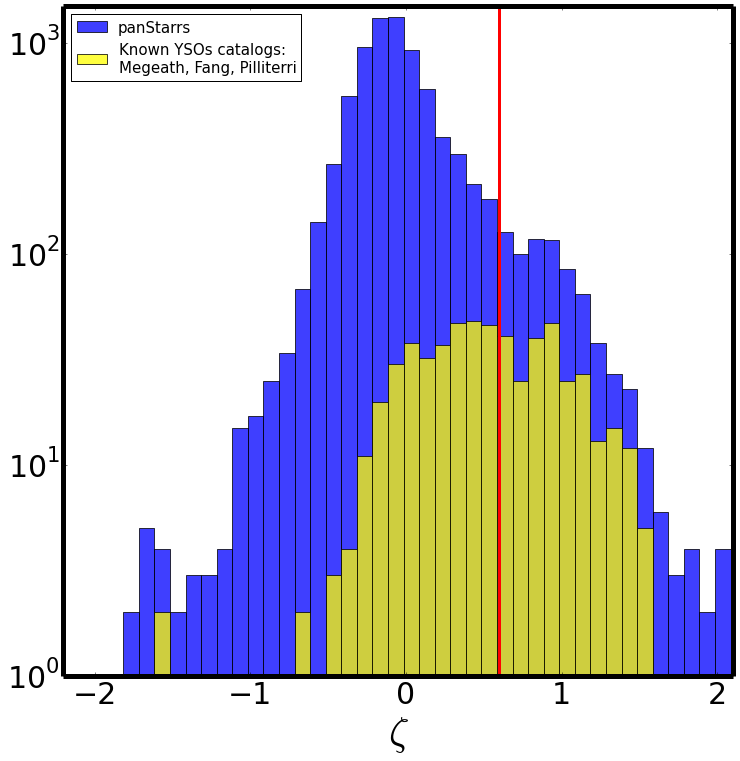

In [22]:
#plot histograms of the norm stdev for various sets of data
rcParams['axes.linewidth'] = 5
test = (np.log10(i_stdev/(i_err*np.sqrt(panStarrs['ndet_ok']))))
plt.xlabel(r'$\zeta$', size = 40)

ok1 = np.where((~np.isnan(test[variable_field]))&(~np.isinf(test[variable_field])))
ok2 = np.where((~np.isnan(test[Matches_inField]))&(~np.isinf(test[Matches_inField])))

binRange=np.arange(min(test[variable_field][ok1]), max(test[variable_field][ok1]) + 0.1, 0.1)

plt.hist(test[variable_field][ok1], bins = binRange, log = True, color = 'blue', alpha = 0.75)
plt.hist(test[Matches_inField][ok2], bins = binRange, log = True, color = 'yellow', alpha = 0.75)
plt.legend(('panStarrs', 'Known YSOs catalogs: \nMegeath, Fang, Pilliterri'), fontsize = 15, loc =2)
#plt.title('I: PanStarrs and WISE YSO \n in Control Field')
plt.plot([0.6, 0.6], [1,10000], color = 'red', linewidth =3)
plt.xlim(-2.2, 2.1)
plt.ylim(1, 1500)
fig = plt.gcf()
plt.rc('font', size = 30)
fig.set_size_inches(12, 12)
#fig.savefig('../../PanSTARRS/VariabilitySelectedAnalysis/NormStdev/I_panStarrs_WISEYSO_hist_paper.pdf')

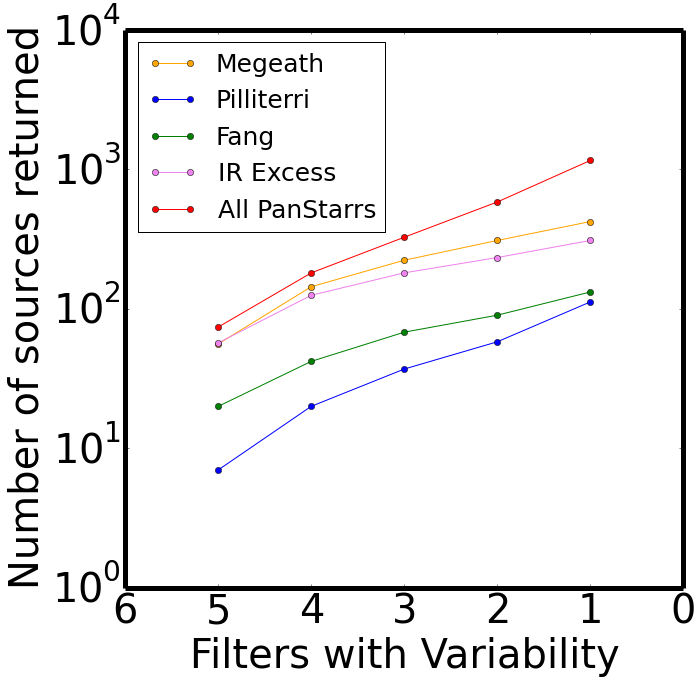

In [15]:
#Plot the number of sources by number of filters satisfied
rcParams['axes.linewidth'] = 5
x = [1, 2, 3, 4, 5]
#total
Megeath1 = [645, 485, 342, 210, 82]
Pilliterri1 = [152, 84, 53, 29, 10]
Fang1 = [210, 143, 100, 60, 25]
Cottle1 = [935, 720, 532, 337, 153]
pan1 = [19329, 5498, 2999, 1709, 691]

#Yso field
Megeath2 = [422, 309, 223, 144, 56]
Pilliterri2 = [112, 58, 37, 20, 7]
Fang2= [132, 90, 68, 42, 20]
Cottle2 = [309, 233, 181, 125, 57]
pan2 = [1157, 583, 326, 181, 74]

#control field
Megeath3 = [0, 0, 0, 0, 0]
Pilliterri3 = [0, 0, 0, 0, 0]
Fang3 = [0, 0, 0, 0, 0]
Cottle3 = [8, 5, 4, 2, 1]
pan3 = [198, 50, 25, 12, 3]


plt.plot(x, Megeath2, '-o', color = 'orange')
plt.plot(x, Pilliterri2, '-o', color = 'blue')
plt.plot(x, Fang2, '-o', color = 'green')
plt.plot(x, Cottle2, '-o', color = 'violet')
plt.plot(x, pan2, '-o', color = 'red')


plt.xlim(6, 0)
plt.yscale('log')
plt.xlabel('Filters with Variability')
plt.ylabel('Number of sources returned')
plt.legend(('Megeath', 'Pilliterri', 'Fang','IR Excess', 'All PanStarrs'), loc= 2, fontsize = 25)
#plt.title('Selected Variability field comparison: YSO Field', fontsize = 18)
plt.rc('font', size = 40) #establishes a default file size
fig = plt.gcf()
fig.set_size_inches(10, 10)
#fig.savefig('../../PanSTARRS/VariabilitySelectedAnalysis/PointsCatalogComparison_YSOfield_poster.pdf')

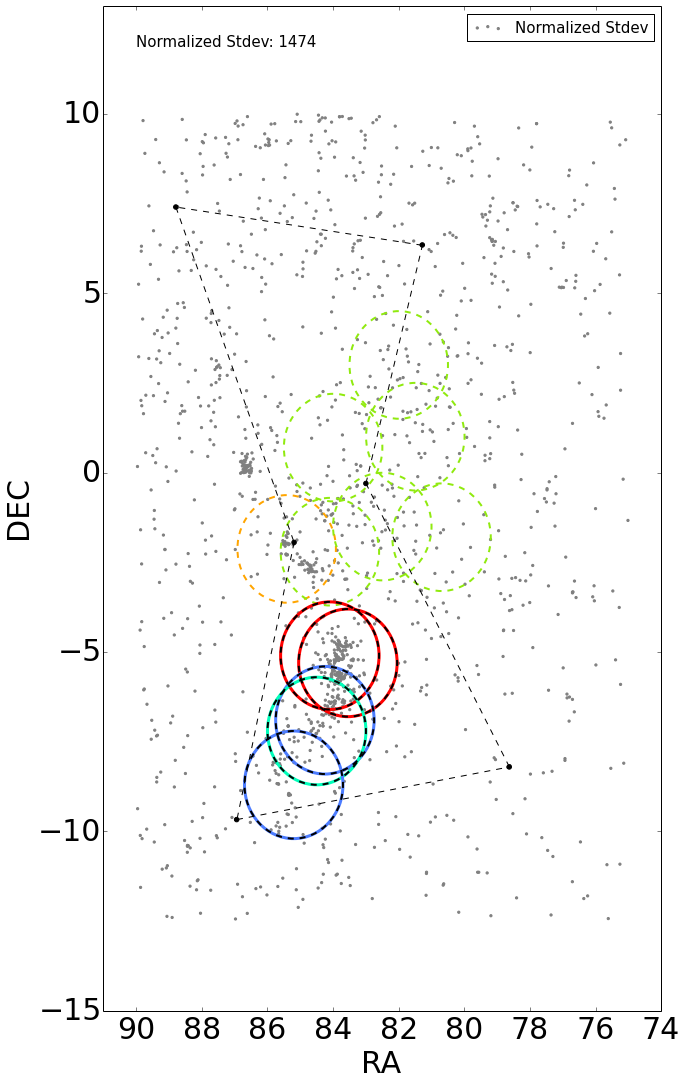

In [42]:
#spatial plot
x = panStarrs['ra']
y = panStarrs['dec']

plt.scatter(x[test], y[test], color = 'grey', marker = '.')

#plt.scatter(x[test3], y[test3], color = 'blue', marker = '.')
#plt.scatter(x[test1], y[test1], color = 'red', marker = '.')
#plt.scatter(x[test2], y[test2], color = 'orange', marker = '.')
#plt.scatter(x[total], y[total], color = 'green', marker = '.')
#plt.legend(('q75-q25', 'Normalized Stdev', 'Stdev', 'Meet all three'), loc = 1, fontsize = '15')

plt.legend(('Normalized Stdev', 'Stdev', 'Meet all three'), loc = 1, fontsize = '15')

#plt.hist2d(x[test2], y[test2], bins=40, norm=LogNorm())
#plt.colorbar()

#Orion pointer stars
plt.scatter([88.792939, 78.634467, 81.282763, 83.001667, 85.189694, 86.939120], 
            [7.407064, -8.201638, 6.349703, -0.299095,  -1.942574, -9.669605], color = 'black')
plt.plot([88.79,85.189], [7.407, -1.9425], color = 'black', linestyle = 'dashed')
plt.plot([85.189,86.93], [-1.9425, -9.669], color = 'black', linestyle = 'dashed')
plt.plot([86.93, 78.63], [ -9.669, -8.2016], color = 'black', linestyle = 'dashed')
plt.plot([78.63, 83.00], [  -8.2016, -0.299], color = 'black', linestyle = 'dashed')
plt.plot([83.00, 81.28], [ -0.299, 6.34], color = 'black', linestyle = 'dashed')
plt.plot([ 81.28, 88.79], [ 6.34, 7.407], color = 'black', linestyle = 'dashed')
#plt.annotate('q75-q25: '+str(len(test3)), xy = (90,12.5), fontsize = 15)
plt.annotate('Normalized Stdev: '+str(len(test)), xy = (90,11.9), fontsize = 15)
#plt.annotate('Stdev: '+str(len(test2)), xy = (90,11.3), fontsize = 15)
#plt.annotate('Meet all Three: '+str(len(total)), xy = (90,10.7), fontsize = 15)

plt.xlabel("RA")
plt.ylabel("DEC")
#For Lambda Ori
plt.xlim(91,74)
plt.ylim(-15,13)



#APOGEE2 Circles
#6 visit OrionB fields
circle6=plt.Circle((86.66,0.1379),1.5,color='#ffa500', fill = False, linestyle = 'dashed', linewidth = 2)
circle7=plt.Circle((85.415,-2.124),1.5,color='#ffa500', fill = False, linestyle = 'dashed', linewidth = 2)
#3 visit OrionOB1AB fields
circle8=plt.Circle((84.099,-2.201),1.5,color='#90ea0f', fill = False, linestyle = 'dashed', linewidth = 2)
circle9=plt.Circle((84.0,0.7),1.5,color='#90ea0f', fill = False, linestyle = 'dashed', linewidth = 2)
circle10=plt.Circle((82.502,-1.5011),1.5,color='#90ea0f', fill = False, linestyle = 'dashed', linewidth = 2)
circle11=plt.Circle((80.697,-1.798),1.5,color='#90ea0f', fill = False, linestyle = 'dashed', linewidth = 2)
circle12=plt.Circle((81.496,1.005),1.5,color='#90ea0f', fill = False, linestyle = 'dashed', linewidth = 2)
circle13=plt.Circle((82.001,3.005),1.5,color='#90ea0f', fill = False, linestyle = 'dashed', linewidth = 2)
circle14=plt.Circle((84.517,-7.034),1.5,color='#ea0fd5', fill = False, linestyle = 'dashed')
#OrionL1641 fields (covered by APOGEE1 circles, so color doesn't matter)
circle15=plt.Circle((84.1, -5.1),1.5,color='black', fill = False, linestyle ='dashed', linewidth = 2)
circle16=plt.Circle((83.55, -5.3),1.5,color= 'black', fill = False, linestyle = 'dashed', linewidth = 2)
circle17=plt.Circle((84.25, -6.9),1.5,color='black', fill = False, linestyle = 'dashed', linewidth = 2)
circle18=plt.Circle((84.5, -7.2),1.5,color='black', fill = False, linestyle = 'dashed', linewidth = 2)
circle19=plt.Circle((85.2, -8.7),1.5,color='black', fill = False, linestyle = 'dashed', linewidth = 2)
#6-visit LambdaOriA field
circle25=plt.Circle((84.133, 10.345),1.5,color='#ffa500', fill = False, linestyle = 'dashed', linewidth = 2)
#3-visit LambdaOriB+C fields
circle26=plt.Circle((82.348, 11.723),1.5,color='#90ea0f', fill = False, linestyle = 'dashed', linewidth = 2)
circle27=plt.Circle((86.611, 8.993 ),1.5,color='#90ea0f', fill = False, linestyle = 'dashed', linewidth = 2)

#APOGEE1 Circles
circle20=plt.Circle((84.1, -5.1),1.5,color='red', fill = False, linewidth = 3)
circle21=plt.Circle((83.55, -5.3),1.5,color='red', fill = False, linewidth = 3)
circle22=plt.Circle((84.25, -6.9),1.5,color='#4c7cff', fill = False, linewidth = 3)
circle23=plt.Circle((84.5, -7.2),1.5,color='#00ffbb', fill = False, linewidth = 3)
circle24=plt.Circle((85.2, -8.7),1.5,color='#4c7cff', fill = False, linewidth = 3)


fig = plt.gcf()
fig.gca().add_artist(circle7)
fig.gca().add_artist(circle8)
fig.gca().add_artist(circle9)
fig.gca().add_artist(circle10)
fig.gca().add_artist(circle11)
fig.gca().add_artist(circle12)
fig.gca().add_artist(circle13)
#fig.gca().add_artist(circle14)
fig.gca().add_artist(circle20)
fig.gca().add_artist(circle21)
fig.gca().add_artist(circle22)
fig.gca().add_artist(circle23)
fig.gca().add_artist(circle24)
#fig.gca().add_artist(circle25)
#fig.gca().add_artist(circle26)
#fig.gca().add_artist(circle27)

fig.gca().add_artist(circle15)
fig.gca().add_artist(circle16)
fig.gca().add_artist(circle17)
fig.gca().add_artist(circle18)
fig.gca().add_artist(circle19)


plt.rc('font', size = 30) #establishes a default file size
fig = plt.gcf()
fig.set_size_inches(10, 18)
#fig.savefig('../../PanSTARRS/VariableSelectedv1_spatial_Hcut.pdf')

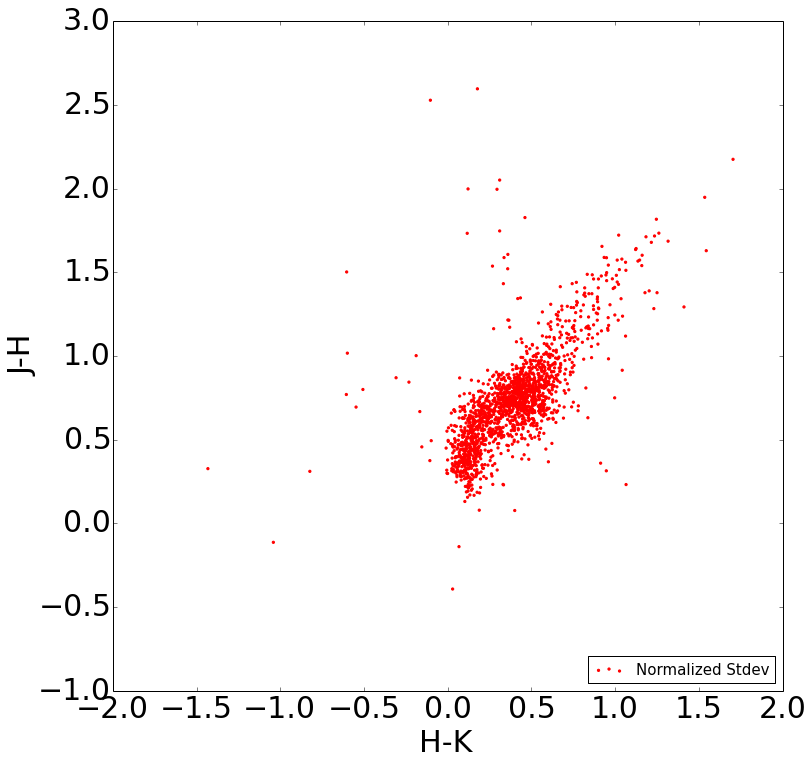

In [7]:
#H-K vs J-H plot
#plt.scatter(panStarrs['h_m'][test3]-panStarrs['k_m'][test3], 
            #panStarrs['j_m'][test3]-panStarrs['h_m'][test3], color = 'blue', marker = '.')
#plt.scatter(panStarrs['h_m'][test1]-panStarrs['k_m'][test1], 
            #panStarrs['j_m'][test1]-panStarrs['h_m'][test1], color = 'red', marker = '.')
#plt.scatter(panStarrs['h_m'][test2]-panStarrs['k_m'][test2], 
            #panStarrs['j_m'][test2]-panStarrs['h_m'][test2], color = 'orange', marker = '.')

#plt.scatter(panStarrs['h_m'][total]-panStarrs['k_m'][total], 
            #panStarrs['j_m'][total]-panStarrs['h_m'][total], color = 'green', marker = '.')

plt.scatter(panStarrs['h_m'][test]-panStarrs['k_m'][test], 
            panStarrs['j_m'][test]-panStarrs['h_m'][test], color = 'red', marker = '.')

#plt.legend(('q75-q25', 'Normalized Stdev', 'Stdev', 'Meet all three'), loc = 4, fontsize = '15')

plt.legend(('Normalized Stdev', 'Stdev', 'Meet all three'), loc = 4, fontsize = '15')

plt.ylabel('J-H')
plt.xlabel('H-K')
fig = plt.gcf()
fig.set_size_inches(12, 12)
#fig.savefig('../../PanSTARRS/VariabilitySelectedAnalysis/H-K_J-H_V4.2.pdf')

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/numpy/ma/core.py:3838: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log10


NameError: name 'test3' is not defined

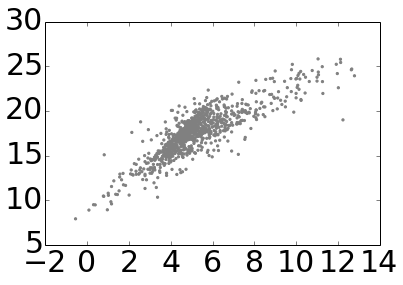

In [8]:
#r-H vs r to compare to Fang
Fang = ascii.read('../../OrionCatalogs/orionCatalogFang.tsv')
g_h = []
for i in range(len(Fang['Hmag'])-2):
    g_h.append(float(Fang["r'mag"][i+2])-float(Fang['Hmag'][i+2]))

plt.scatter(g_h, Fang["r'mag"][2:], color = 'grey', marker = '.')

plt.scatter(-2.5*np.log10(r_median)[test3]-panStarrs['h_m'][test3], 
            -2.5*np.log10(r_median)[test3], color = 'blue', marker = '.')
plt.scatter(-2.5*np.log10(r_median)[test1]-panStarrs['h_m'][test1], 
            -2.5*np.log10(r_median)[test1], color = 'red', marker = '.')
plt.scatter(-2.5*np.log10(r_median)[test2]-panStarrs['h_m'][test2], 
            -2.5*np.log10(r_median)[test2], color = 'orange', marker = '.')
plt.scatter(-2.5*np.log10(r_median)[total]-panStarrs['h_m'][total], 
            -2.5*np.log10(r_median)[total], color = 'green', marker = '.')

plt.legend(('Fang', 'q75-q25', 'Normalized Stdev', 'Stdev', 'Meet all three'), loc = 1, fontsize = '15')    
plt.ylim(20, 10)    
plt.ylabel('r')
plt.xlabel('r-H')
fig = plt.gcf()
fig.set_size_inches(12, 8)
#fig.savefig('../../PanSTARRS/VariabilitySelectedAnalysis/r-H_r_V1.pdf')

In [9]:
#Select YSO and control box
YSO_field =[]
for i in range(len(panStarrs)):
    if (panStarrs['ra'][i] < 85.0 and panStarrs['ra'][i] > 83.0 and panStarrs['dec'][i] > -8.0 
    and panStarrs['dec'][i] < -4.0): 
        YSO_field.append(i)
        
control_field = []
for i in range(len(panStarrs)):
    if (panStarrs['ra'][i] < 78.0 and panStarrs['ra'][i] > 76.0 and panStarrs['dec'][i] > -8.0 
    and panStarrs['dec'][i] < -4.0): 
        control_field.append(i)


/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in divide
  from IPython.kernel.zmq import kernelapp as app
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:6: RuntimeWarning: invalid value encountered in divide
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log10
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log10
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:20: RuntimeWarning: divide by zero encountered in divide
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:20: RuntimeWarning: invalid value encountered 

9232
4353


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/colorbar.py:581: RuntimeWarning: invalid value encountered in greater
  inrange = (ticks > -0.001) & (ticks < 1.001)
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/colorbar.py:581: RuntimeWarning: invalid value encountered in less
  inrange = (ticks > -0.001) & (ticks < 1.001)
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/colors.py:576: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


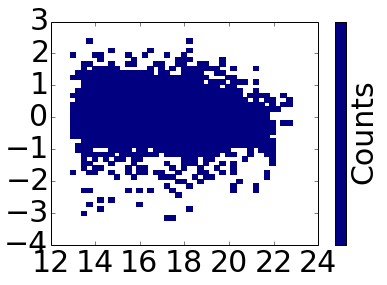

In [40]:
#density plot? 
x = np.array(-2.5*np.log10(g_median[control_field]))
y = np.array(g_stdev[control_field]/(g_err[control_field]*np.sqrt(panStarrs['ndet_ok'][control_field])))


x2 = np.array(-2.5*np.log10(g_median[YSO_field]))
y2 = np.array(g_stdev[YSO_field]/(g_err[YSO_field]*np.sqrt(panStarrs['ndet_ok'][YSO_field])))

y1 = np.array(np.log10(y))
y3 = np.array(np.log10(y2))

ok1 = np.where((~np.isnan(y1))&(~np.isinf(y1)))[0]
ok2 = np.where((~np.isnan(y3))&(~np.isinf(y3)))[0]


# Estimate the 2D histogram
nbins = 40
H1, xedges1, yedges1 = np.histogram2d(x[ok1],y1[ok1],bins=nbins)
H2, xedges2, yedges2 = np.histogram2d(x2[ok2],y3[ok2],bins=nbins)

H = np.divide(H2,H1)

# H needs to be rotated and flipped
H = np.rot90(H)
H = np.flipud(H)
 
# Mask zeros
#Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero
Hmasked = np.ma.masked_where(np.isnan(H),H) # Mask pixels with a value nan
#Hmasked = np.ma.masked_where(np.isinf(H),H) # Mask pixels with a value inf
 
if max(xedges1)-min(xedges1) > max(xedges2) - min(xedges2):
    xedges = xedges1
else: 
    xedges = xedges2
    
if max(yedges1)-min(yedges1) > max(yedges2) - min(yedges2):
    yedges = yedges1
else: 
    yedges = yedges2
    
# Plot 2D histogram using pcolor
fig2 = plt.figure()
plt.pcolormesh(xedges,yedges,Hmasked)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')

print len(YSO_field)
print len(control_field)

/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in divide
  from IPython.kernel.zmq import kernelapp as app
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log10
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:20: RuntimeWarning: divide by zero encountered in divide
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:20: RuntimeWarning: invalid value encountered in divide
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:58: RuntimeWarning: divide by zero encountered in log10
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:58: RuntimeWarning: invalid value encountered in divide
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:61: RuntimeWarning: divide by zero encounte

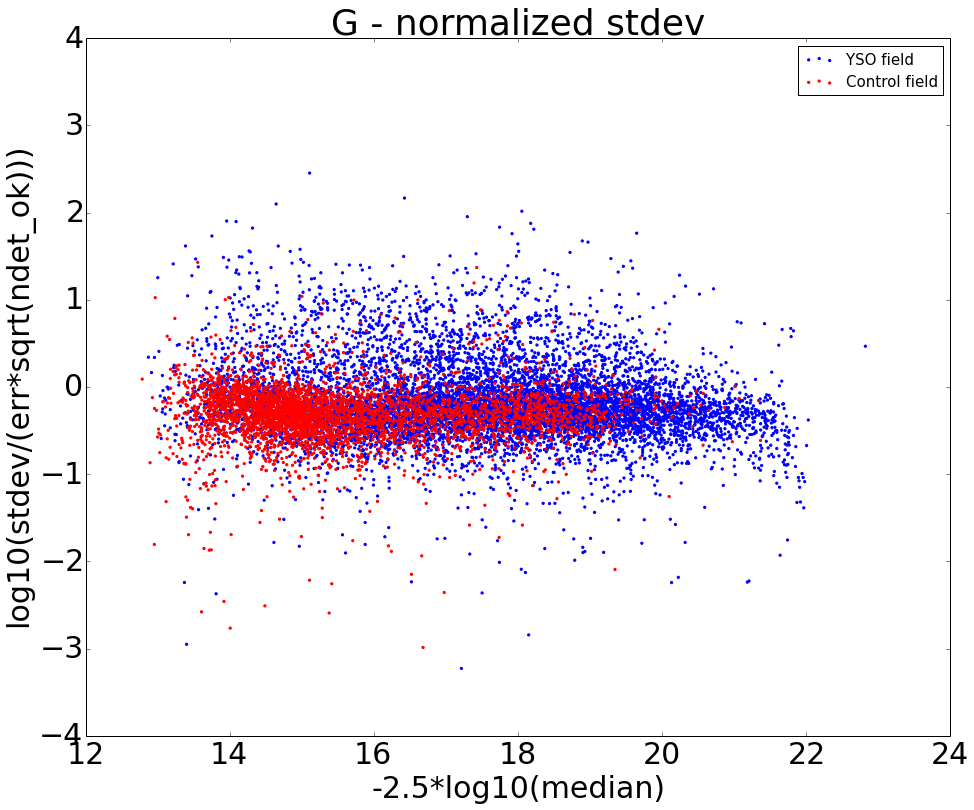

In [41]:
x = np.array(-2.5*np.log10(g_median[control_field]))
y = np.array(g_stdev[control_field]/(g_err[control_field]*np.sqrt(panStarrs['ndet_ok'][control_field])))


x2 = np.array(-2.5*np.log10(g_median[test]))
y2 = np.array(g_stdev[test]/(g_err[test]*np.sqrt(panStarrs['ndet_ok'][test])))

y1 = np.array(np.log10(y))
y3 = np.array(np.log10(y2))

ok1 = np.where((~np.isnan(y1))&(~np.isinf(y1)))[0]
ok2 = np.where((~np.isnan(y3))&(~np.isinf(y3)))[0]


# Estimate the 2D histogram
nbins = 40
H1, xedges1, yedges1 = np.histogram2d(x[ok1],y1[ok1],bins=nbins)
H2, xedges2, yedges2 = np.histogram2d(x2[ok2],y3[ok2],bins=nbins)

H = H2/H1

# H needs to be rotated and flipped
H = np.rot90(H)
H = np.flipud(H)
 
# Mask zeros
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero
 
if max(xedges1)-min(xedges1) > max(xedges2) - min(xedges2):
    xedges = xedges1
else: 
    xedges = xedges2
    
if max(yedges1)-min(yedges1) > max(yedges2) - min(yedges2):
    yedges = yedges1
else: 
    yedges = yedges2
    
# Plot 2D histogram using pcolor
#fig2 = plt.figure()
#plt.pcolormesh(xedges,yedges,Hmasked)
#cbar = plt.colorbar()
#cbar.ax.set_ylabel('Counts')





#plt.hist2d(x[ok1], y1[ok1], bins=40)
#plt.hist2d(x2[ok2], y3[ok2], bins=40)
#plt.colorbar()
plt.ylabel("log10(stdev/(err*sqrt(ndet_ok)))")


a = np.arange(12, 23, 0.5)
b = -(1/10.0)*a + (22.0/10.0)
#plt.plot(a, b, color = 'limegreen', linewidth = 3)
plt.scatter(-2.5*np.log10(g_median[YSO_field]), np.log10(g_stdev[YSO_field]/(g_err[YSO_field]*np.sqrt(panStarrs['ndet_ok'][YSO_field]))), 
            marker = '.', color = 'blue')

plt.scatter(-2.5*np.log10(g_median[control_field]), np.log10(g_stdev[control_field]/(g_err[control_field]*np.sqrt(panStarrs['ndet_ok'][control_field]))), 
            marker = '.', color = 'red')

plt.legend(('YSO field', 'Control field'), loc = 1, fontsize = 15)
plt.ylim(-4, 4)
plt.ylabel("log10(stdev/(err*sqrt(ndet_ok)))")
plt.xlabel("-2.5*log10(median)")
plt.title('G - normalized stdev')
fig = plt.gcf()
plt.rc('font', size = 30)
fig.set_size_inches(15.5, 12.5)
#fig.savefig('../../PanSTARRS/VariabilityVsUncertainty/g_stdev_err_vs_median_YSOandControl_V2.pdf')

In [7]:
#compare to other catalogs: read in files
Fang = ascii.read('../../OrionCatalogs/orionCatalogFang.tsv')
Megeath = ascii.read('../../OrionCatalogs/orionCatalogMegeath.tsv')
Pilliterri = ascii.read('../../OrionCatalogs/orionCatalogPilliterri.tsv')
Cottle = ascii.read('../../KoenigSelectedCatalogs/Orion/SelectionV2/CottleIR_Excess_Selection_v2.txt')

In [8]:
#impose a 7 < H < 13.0 cut on all catalogs
#The lists returned are for the original array as the indices
#are passed directly to the new lists. Call: Megeath[MegeathMag]
CottleMag = []
for i in range(len(Cottle)):
    if Cottle['h_m_2mass'][i] > 7.0 and Cottle['h_m_2mass'][i] < 13.0:
        CottleMag.append(i)

MegeathMag = []
for i in range(len(Megeath)):
    if i > 3: 
        if float(Megeath['Hmag'][i]) > 7.0 and float(Megeath['Hmag'][i]) < 13.0:
            MegeathMag.append(i)
        
FangMag = []
for i in range(len(Fang)):
    if i > 3: 
        if float(Fang['Hmag'][i]) > 7.0 and float(Fang['Hmag'][i]) < 13.0:
            FangMag.append(i)

PilliterriMag = []
for i in range(len(Pilliterri)):
    if i > 3: 
        if float(Pilliterri['Hmag'][i]) > 7.0 and float(Pilliterri['Hmag'][i]) < 13.0:
            PilliterriMag.append(i)
            
variableMag = []
for i in test:
    if float(panStarrs['h_m'][i]) > 7.0 and float(panStarrs['h_m'][i]) < 13.0:
        variableMag.append(i)
            
print len(Cottle)
print len(CottleMag)

print len(Megeath)
print len(MegeathMag)

print len(Fang)
print len(FangMag)

print len(Pilliterri)
print len(PilliterriMag)

print len(test)
print len(variableMag)

2699
1729
3481
1706
1390
708
1043
650
153
139


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/numpy/ma/core.py:3838: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


In [9]:
#select the sources in each catalog that are within YSO box
Cottle_field =[]
for i in range(len(Cottle)):
    if (Cottle['ra'][i] < 85.0 and Cottle['ra'][i] > 83.0 and Cottle['dec'][i] > -8.0 
    and Cottle['dec'][i] < -4.0): 
        Cottle_field.append(i)
        
Megeath_field =[]
for i in range(len(Megeath)):
    if i > 3:
        if (float(Megeath['_RAJ2000'][i]) < 85.0 and float(Megeath['_RAJ2000'][i]) > 83.0 and float(Megeath['_DEJ2000'][i]) > -8.0 
        and float(Megeath['_DEJ2000'][i]) < -4.0): 
            Megeath_field.append(i)
        
Pilliterri_field =[]
for i in range(len(Pilliterri)):
    if i > 3:
        if (float(Pilliterri['RAJ2000'][i]) < 85.0 and float(Pilliterri['RAJ2000'][i]) > 83.0 and float(Pilliterri['DEJ2000'][i]) > -8.0 
        and float(Pilliterri['DEJ2000'][i]) < -4.0): 
            Pilliterri_field.append(i)
        
Fang_field =[]
for i in range(len(Fang)):
    if i > 3:
        if (float(Fang['_RAJ2000'][i]) < 85.0 and float(Fang['_RAJ2000'][i]) > 83.0 and float(Fang['_DEJ2000'][i]) > -8.0 
        and float(Fang['_DEJ2000'][i]) < -4.0): 
            Fang_field.append(i)
        
variable_field =[]
for i in test:
    if (panStarrs['ra'][i] < 85.0 and panStarrs['ra'][i] > 83.0 and panStarrs['dec'][i] > -8.0 
    and panStarrs['dec'][i] < -4.0): 
        variable_field.append(i)

print len(Cottle_field)
print len(Megeath_field)
print len(Pilliterri_field)
print len(Fang_field)
print len(variable_field)

851
2294
752
887
57


In [16]:
#match the koenig and Fang/Megeath catalogs by class
#matchCatalog returns the indices of the second catalog that coorespond to matches in the 
#first. Since the catalogs are based off the class lists, the indices are dependent
#on the list of sources for each class. 
#Call: Megeath[MegeathI][Mclass1Koenig] or Koenig[KoenigMag][Kclass1Fang]
from matchCatalog import matchCatalog
#no cuts at all:

FangCoord = SkyCoord(Fang['_RAJ2000'][2:], Fang['_DEJ2000'][2:], unit='deg')
CottleCoord = SkyCoord(Cottle['ra'], Cottle['dec'], unit = 'deg')
MegeathCoord = SkyCoord(Megeath['_RAJ2000'][2:], Megeath['_DEJ2000'][2:], unit='deg')
PilliterriCoord = SkyCoord(Pilliterri['RAJ2000'][2:], Pilliterri['DEJ2000'][2:], unit='deg')
VariableCoord = SkyCoord(panStarrs['ra'], panStarrs['dec'], unit = 'deg')

#only in YSO field:

#FangCoord = SkyCoord(Fang['_RAJ2000'][Fang_field], Fang['_DEJ2000'][Fang_field], unit='deg')
#CottleCoord = SkyCoord(Cottle['ra'][Cottle_field], Cottle['dec'][Cottle_field], unit = 'deg')
#MegeathCoord = SkyCoord(Megeath['_RAJ2000'][Megeath_field], Megeath['_DEJ2000'][Megeath_field], unit='deg')
#PilliterriCoord = SkyCoord(Pilliterri['RAJ2000'][Pilliterri_field], Pilliterri['DEJ2000'][Pilliterri_field], unit='deg')
#VariableCoord = SkyCoord(panStarrs['ra'][variable_field], panStarrs['dec'][variable_field], unit = 'deg')

#with Magcuts:

#FangCoord = SkyCoord(Fang['_RAJ2000'][FangMag], Fang['_DEJ2000'][FangMag], unit='deg')
#CottleCoord = SkyCoord(Cottle['ra'][CottleMag], Cottle['dec'][CottleMag], unit = 'deg')
#MegeathCoord = SkyCoord(Megeath['_RAJ2000'][MegeathMag], Megeath['_DEJ2000'][MegeathMag], unit='deg')
#PilliterriCoord = SkyCoord(Pilliterri['RAJ2000'][PilliterriMag], Pilliterri['DEJ2000'][PilliterriMag], unit='deg')
#VariableCoord = SkyCoord(panStarrs['ra'][variableMag], panStarrs['dec'][variableMag], unit = 'deg')

VFang, fangDist = matchCatalog(FangCoord, VariableCoord, 3.0, False)
VMegeath, megeathDist = matchCatalog(MegeathCoord, VariableCoord, 3.0, False)
VPilliterri, pilliterriDist = matchCatalog(PilliterriCoord, VariableCoord, 3.0, False)
VCottle, cottleDist = matchCatalog(CottleCoord, VariableCoord, 3.0, False)

##combine all knownYSOs into on catalog matched with panstarrs
knownYSO1 = join(panStarrs[VFang], panStarrs[VMegeath], join_type='outer')
#knownYSO = join(knownYSO1, panStarrs[VPilliterri], join_type='outer')


notMatched = []
for i in range(len(variable_field)):
    if i not in VFang:
        if i not in VMegeath:
            if i not in VPilliterri:
                if i not in VCottle:
                    notMatched.append(variable_field[i])



ValueError: could not broadcast input array from shape (1973) into shape (1973,5)

In [22]:
#print variable selected sources found in other catalogs
print 'Total:', len(VariableCoord)
print "Variability Matches to Fang:",len(VFang)
print "Variability Matches to Megeath:",len(VMegeath)
print "Variability Matches to Pilliterri:",len(VPilliterri)
print "Variability Matches to WISE+2MASS:",len(VCottle)
print "Total Matches:", len(VCottle) + len(VPilliterri)+ len(VMegeath)+len(VFang), ' **Possibility of double counting!'
print "Percentage of Variability Selected that have Matches:",(len(VCottle) + len(VPilliterri)+ len(VMegeath)+len(VFang))/float(len(test))*100
#print "Percentage of Variability within Mag cuts that have Matches:",(len(VCottle) + len(VPilliterri)+ len(VMegeath)+len(VFang))/float(len(variableMag))*100

Total: 1474
Variability Matches to Fang: 85
Variability Matches to Megeath: 296
Variability Matches to Pilliterri: 48
Variability Matches to WISE+2MASS: 448
Total Matches: 877  **Possibility of double counting!
Percentage of Variability Selected that have Matches: 29.243081027


In [85]:
#only trust these if you matched to the variable field coordinates
print "IN ONLY THE YSO FIELD:"
print 'Total:', len(variable_field)
print "Variability Matches to Fang:",len(VFang)
print "Variability Matches to Megeath:",len(VMegeath)
print "Variability Matches to Pilliterri:",len(VPilliterri)
print "Variability Matches to WISE+2MASS:",len(VCottle)
print "Percentage of Variability Matches to Fang:",(len(VFang))/float(len(variable_field))*100
print "Percentage of Variability Matches to Megeath:",(len(VMegeath))/float(len(variable_field))*100
print "Percentage of Variability Matches to Pilliterri:",(len(VPilliterri))/float(len(variable_field))*100
print "Percentage of Variability Matches to 2MASS+WISE:",(len(VCottle))/float(len(variable_field))*100

IN ONLY THE YSO FIELD:
Total: 74
Variability Matches to Fang: 20
Variability Matches to Megeath: 56
Variability Matches to Pilliterri: 7
Variability Matches to WISE+2MASS: 57
Percentage of Variability Matches to Fang: 27.027027027
Percentage of Variability Matches to Megeath: 75.6756756757
Percentage of Variability Matches to Pilliterri: 9.45945945946
Percentage of Variability Matches to 2MASS+WISE: 77.027027027


/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


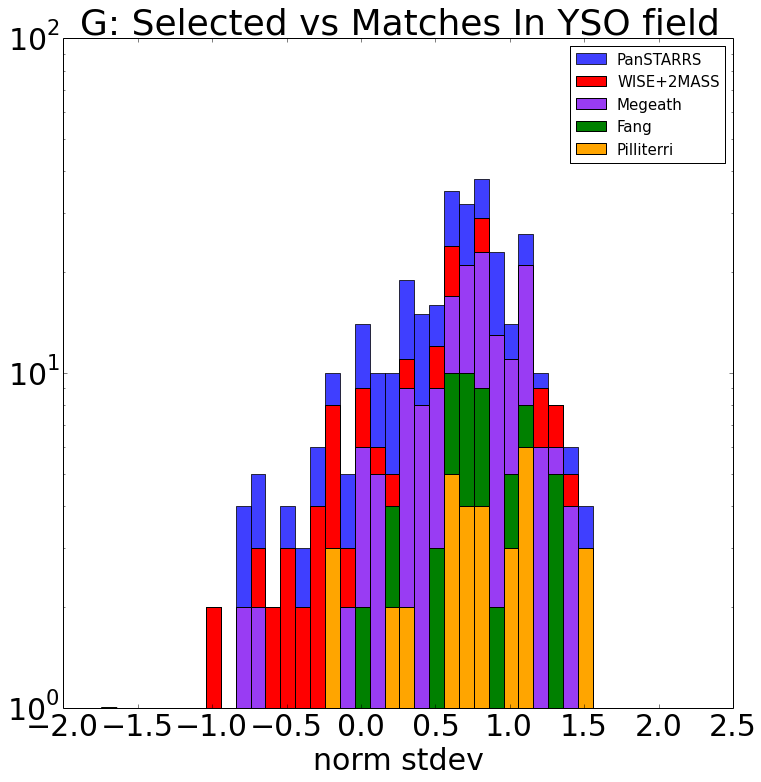

In [122]:
test = (np.log10(g_stdev/(g_err*np.sqrt(panStarrs['ndet_ok']))))
plt.xlabel('norm stdev')

ok1 = np.where((~np.isnan(test[variable_field]))&(~np.isinf(test[variable_field])))
ok2 = np.where((~np.isnan(test[variable_field][VCottle]))&(~np.isinf(test[variable_field][VCottle])))
ok3 = np.where((~np.isnan(test[variable_field][VFang]))&(~np.isinf(test[variable_field][VFang])))
ok4 = np.where((~np.isnan(test[variable_field][VMegeath]))&(~np.isinf(test[variable_field][VMegeath])))
ok5 = np.where((~np.isnan(test[variable_field][VPilliterri]))&(~np.isinf(test[variable_field][VPilliterri])))

binRange=np.arange(min(test[variable_field][ok1]), max(test[variable_field][ok1]) + 0.1, 0.1)

plt.hist(test[variable_field][ok1], bins = binRange, log = True, color = 'blue', alpha = 0.75)
plt.hist(test[variable_field][VMegeath][ok4], bins =binRange, log = True, color = 'red')
plt.hist(test[variable_field][VCottle][ok2], bins=binRange, log = True, color = '#993cf3')
plt.hist(test[variable_field][VFang][ok3], bins =binRange, log = True, color = 'green')
plt.hist(test[variable_field][VPilliterri][ok5], bins =binRange, log = True, color = 'orange')
plt.legend(('PanSTARRS', 'WISE+2MASS', 'Megeath', 'Fang', 'Pilliterri'), fontsize = 15)
plt.title('G: Selected vs Matches In YSO field')
fig = plt.gcf()
plt.rc('font', size = 30)
fig.set_size_inches(12, 12)
#fig.savefig('../../PanSTARRS/VariabilitySelectedAnalysis/NormStdev/G_compiled_hist_consistentBins.pdf')